### reference
- https://seamless.tistory.com/38

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### GD(Gradient Descent)
![](https://t1.daumcdn.net/cfile/tistory/99E6363359D86A8805)
- 옵티마이저(최적화)계의 어머니로써, 모든 옵티마이저의 기본이 된다.
- loss function의 현 weight의 기울기(gradient)를 구하고 loss를 줄이는 방향으로 업데이트(조정)해 나가는 방법을 통해서 뉴럴 네트워크를 학습
- 현재 학습에 사용되는 모든 데이터를 한꺼번에 학습에 사용된다 -> 정확도는 좋으나 속도가 너무 느림

![](https://t1.daumcdn.net/cfile/tistory/99EC803359D86AF115)

$${\sum}$$

#### Gradient Descent 구현

In [3]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

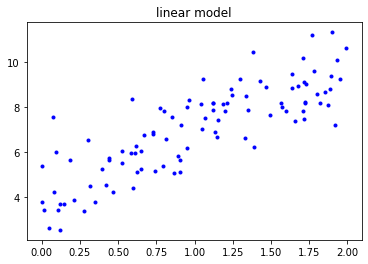

In [4]:
plt.title("linear model")
plt.plot(x,y,"b.")
plt.show()

In [5]:
x_b = np.c_[np.ones((100, 1)), x] # input x_1, x_0

eta = 0.03 # learning_rate 
n_iterations = 1000 # epoch
m = 100 # 샘플의 갯수
theta = np.random.randn(2,1) # weight w_1, w_0

In [6]:
gradients_list = []

In [7]:
for iteration in range(n_iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta) - y)
    gradients_list.append(gradients)
    if(iteration%100 == 0):
        print("epoch",iteration," w_1의 decent:",gradients[0],"w_0의 decent:",gradients[1])
    theta = theta - eta*gradients
gradients_list = np.array(gradients_list)

epoch 0  w_1의 decent: [-15.15733413] w_0의 decent: [-16.9042663]
epoch 100  w_1의 decent: [-0.271575] w_0의 decent: [0.22483535]
epoch 200  w_1의 decent: [-0.10703333] w_0의 decent: [0.08861881]
epoch 300  w_1의 decent: [-0.04218532] w_0의 decent: [0.03492756]
epoch 400  w_1의 decent: [-0.01662661] w_0의 decent: [0.01376609]
epoch 500  w_1의 decent: [-0.00655309] w_0의 decent: [0.00542566]
epoch 600  w_1의 decent: [-0.00258278] w_0의 decent: [0.00213843]
epoch 700  w_1의 decent: [-0.00101796] w_0의 decent: [0.00084282]
epoch 800  w_1의 decent: [-0.00040121] w_0의 decent: [0.00033218]
epoch 900  w_1의 decent: [-0.00015813] w_0의 decent: [0.00013092]


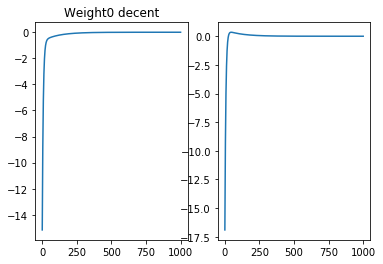

In [22]:
fig, axs = plt.subplots(1,2)
axs[0].plot(gradients_list[:,0,0])
axs[0].set_title("Weight1 decent")
axs[1].plot(gradients_list[:,1,0])
axs[0].set_title("Weight0 decent")
plt.show()

In [30]:
import pandas as pd

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [25]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]

scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000
learning_rate = 0.01

mse_arr = []

In [ ]:
tf.random.normal()

In [166]:
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random.uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
hypothesis = tf.matmul(X, theta, name="predictions")
error = hypothesis - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = theta.assign(theta - learning_rate * gradients)

In [167]:
for i in range(100):
    print(training_op)

<tf.Variable 'UnreadVariable' shape=(9, 1) dtype=float32, numpy=
array([[ 0.11717197],
       [-0.72099775],
       [-0.9073543 ],
       [-0.53635585],
       [-0.32218242],
       [-0.19372371],
       [-0.92086446],
       [-0.68876433],
       [-0.6123088 ]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(9, 1) dtype=float32, numpy=
array([[ 0.11717197],
       [-0.72099775],
       [-0.9073543 ],
       [-0.53635585],
       [-0.32218242],
       [-0.19372371],
       [-0.92086446],
       [-0.68876433],
       [-0.6123088 ]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(9, 1) dtype=float32, numpy=
array([[ 0.11717197],
       [-0.72099775],
       [-0.9073543 ],
       [-0.53635585],
       [-0.32218242],
       [-0.19372371],
       [-0.92086446],
       [-0.68876433],
       [-0.6123088 ]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(9, 1) dtype=float32, numpy=
array([[ 0.11717197],
       [-0.72099775],
       [-0.9073543 ],
       [-0.53635585],
       

In [45]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [46]:
data = pd.DataFrame(data=housing['data'],columns=housing['feature_names'])

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [137]:
x_data = data.values

In [138]:
y_data = np.reshape(housing['target'],(-1,1))

In [139]:
x_data.dot(theta).shape

(20640, 1)

In [140]:
eta = 0.0000001 # learning_rate 
n_iterations = 1000000 # epoch
m = len(x_data)# 샘플의 갯수


theta = np.random.randn(8,1) # weight w_1, w_0

In [141]:
gradients_list = []

In [143]:
np.unique(y_data)

array([0.14999, 0.175  , 0.225  , ..., 4.991  , 5.     , 5.00001])

In [142]:
for iteration in range(n_iterations):
    gradients = 2/m*x_data.T.dot(x_data.dot(theta) - y_data)
    gradients_list.append(gradients)
    if(iteration%100000 == 0):
        mse = np.sum(1/m*np.square(x_data.dot(theta) - y_data))
        print("epoch",iteration,"mse:",mse," w_1의 decent:",gradients[0],"w_0의 decent:",gradients[1])
    theta = theta - eta*gradients
    
gradients_list = np.array(gradients_list)

epoch 0 mse: 5983589.8838497605  w_1의 decent: [-14789.31615607] w_0의 decent: [-97809.27078015]
epoch 10000 mse: 16.524821152523536  w_1의 decent: [2.62765779] w_0의 decent: [-6.2788042]
epoch 20000 mse: 12.711511866549428  w_1의 decent: [2.54900849] w_0의 decent: [-5.25307001]
epoch 30000 mse: 10.19684701087132  w_1의 decent: [2.48477645] w_0의 decent: [-4.39396096]
epoch 40000 mse: 8.529644140080773  w_1의 decent: [2.43218979] w_0의 decent: [-3.67764375]
epoch 50000 mse: 7.415652356111928  w_1의 decent: [2.38912622] w_0의 decent: [-3.08181451]
epoch 60000 mse: 6.6629592102520405  w_1의 decent: [2.35383561] w_0의 decent: [-2.5872383]
epoch 70000 mse: 6.146391640352454  w_1의 decent: [2.32487712] w_0의 decent: [-2.1774482]
epoch 80000 mse: 5.784301617840488  w_1의 decent: [2.30106634] w_0의 decent: [-1.83843365]
epoch 90000 mse: 5.523427399420431  w_1의 decent: [2.28143105] w_0의 decent: [-1.5583364]
epoch 100000 mse: 5.329020800560035  w_1의 decent: [2.26517426] w_0의 decent: [-1.32716512]
epoch 110000 ms

epoch 910000 mse: 1.9885386650844057  w_1의 decent: [1.77464539] w_0의 decent: [-0.1173371]
epoch 920000 mse: 1.9701735340806317  w_1의 decent: [1.76717293] w_0의 decent: [-0.11603893]
epoch 930000 mse: 1.9520850677044868  w_1의 decent: [1.75968574] w_0의 decent: [-0.11475656]
epoch 940000 mse: 1.934268558496302  w_1의 decent: [1.75218478] w_0의 decent: [-0.11348978]
epoch 950000 mse: 1.9167193902877946  w_1의 decent: [1.744671] w_0의 decent: [-0.11223841]
epoch 960000 mse: 1.8994330362185694  w_1의 decent: [1.73714532] w_0의 decent: [-0.11100224]
epoch 970000 mse: 1.8824050567993513  w_1의 decent: [1.72960866] w_0의 decent: [-0.10978108]
epoch 980000 mse: 1.8656310980208581  w_1의 decent: [1.72206191] w_0의 decent: [-0.10857474]
epoch 990000 mse: 1.8491068895069018  w_1의 decent: [1.71450594] w_0의 decent: [-0.10738304]


In [159]:
x_data[5].dot(theta)

array([1.86060345])

In [160]:
y_data[5]

array([2.697])

### SGD(Stochastic Gradient Descent)
![](https://t1.daumcdn.net/cfile/tistory/999EA83359D86B6B0B)

### GD와 SGD의 차이점
![](https://t1.daumcdn.net/cfile/tistory/9961913359D86B9833)
#### GD
- 모든 데이터를 계산한다 => 소요시간 1시간
- 최적의 한스텝을 나아간다.
- 6 스텝 * 1시간 = 6시간

#### SGD
- 일부 데이터만 계산한다 => 소요시간 5분
- 빠르게 전진한다.
- 10 스텝 * 5분 => 50분
- 조금 헤메지만 그래도 빠르게 간다!

In [ ]:
일부 데이터만 계산한다 => 소요시간 5분
빠르게 전진한다.
10 스텝 * 5분 => 50분
조금 헤메지만 그래도 빠르게 간다!

![](https://t1.daumcdn.net/cfile/tistory/993D383359D86C280D)

### Adaptive Method Optimizer가 어떤상황(Object_Detection)에서는 학습에 나쁜 결과를 만든다.
- 논문: **The Marginal Value of Adaptive Gradient Mehtods in Machine Learning**
- 내용: Adaptive method(AdaGrad, RMSPROP, Adam)이 일부 데이터셋에서 나쁜 결과를 보인다. 따라서 모멘텀 최적화, SGD, 네스테로프 경사 가속을 사용하는 것이 나올 수 있다고 주장한다. 
- Gradient descent (GD)나 Stochastic gradient descent (SGD)를 이용하여 찾은 solution이 다른 adaptive methods (e.g. AdaGrad, RMSprop, and Adam)으로 찾은 solution보다 훨씬 generalization 측면에서 뛰어나다.